## Pymaceuticals 

 
## Observations

1. Since there is a postive strong correlation on mouse weight v. average tumor volume we can infer that tumor size size accounts for a considerable amount of a mouse's weight as is causing increase in the weight of a mouse. 

2. Looking at the box plot and the bar graph,  the fact that the Capomulin and Ramicane treatments had more trials from the other other two top performing regimens, we can attribute this with Capomulin and Ramicanes out performance of the other two.  Considering ther were more test subject who had lower tumor volume average, we can infer that Capomulin and Ramican are the best regimens.

3. Looking at the line graph for test subject s185, we can infer that Capomulin is a successful treatment given that the tumor volume significantly declined over timepoint due to the Capomulin treatment. 


# Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import iqr
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_group = merged_df.groupby("Drug Regimen")

tumor_mean = tumor_group['Tumor Volume (mm3)'].mean()

tumor_mean

tumor_median = tumor_group['Tumor Volume (mm3)'].median()

tumor_median

tumor_var = tumor_group['Tumor Volume (mm3)'].var()

tumor_var

tumor_sdv = tumor_group['Tumor Volume (mm3)'].std()

tumor_sdv

tumor_sem = tumor_group['Tumor Volume (mm3)'].sem()

tumor_sem

tumor_stats = pd.DataFrame(tumor_mean)

tumor_stats = tumor_stats.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume (mm3)'})

tumor_stats['Median Tumor Volume (mm3)'] = (tumor_median)

tumor_stats['Variance Tumor Volume (mm3)'] = (tumor_var)

tumor_stats['Std. Dev. Tumor Volume (mm3)'] = (tumor_sdv)

tumor_stats['SEM Tumor Volume (mm3)'] = tumor_sem

tumor_stats


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std. Dev. Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar plots

Text(0, 0.5, 'Number of Trials')

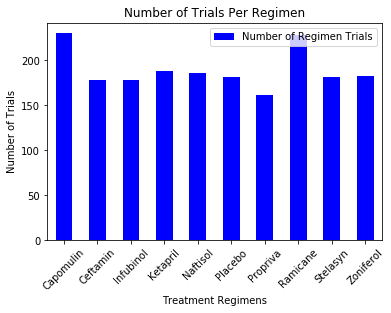

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

reg_count = merged_df.groupby("Drug Regimen")

total_count = reg_count['Tumor Volume (mm3)'].count()

total_count_df = pd.DataFrame(total_count)

total_count_df = total_count_df.rename(columns={'Tumor Volume (mm3)':'Number of Regimen Trials'})

tc_graph = total_count_df.plot(kind="bar",  title="Number of Trials Per Regimen", rot=45, color='b')

tc_graph.set_xlabel("Treatment Regimens")

tc_graph.set_ylabel("Number of Trials")





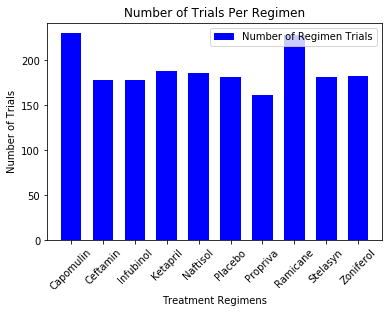

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

total_count_data = total_count.reset_index()

total_count_data

drug_regimen = total_count_data['Drug Regimen']

num_regimen = total_count_data['Tumor Volume (mm3)']

num_regimen

x_axis = np.arange(len(num_regimen))

plt.bar(x_axis, num_regimen, color='b', align='center', width=.65)

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, drug_regimen, rotation=45)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Number of Trials Per Regimen")

plt.xlabel("Treatment Regimens")

plt.ylabel("Number of Trials")

plt.legend(["Number of Regimen Trials"])


# Pie plots

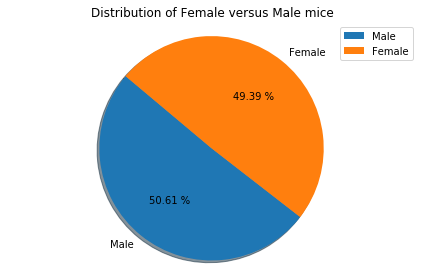

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas 

gender_counts = merged_df["Sex"].value_counts()

gender_list = gender_counts.keys()

gender_pie = gender_counts.plot(kind="pie", y=gender_list, title="Distribution of Female versus Male mice", autopct="%.2f %%", shadow=True, startangle=140)

gender_pie.set_ylabel("")    

plt.axis("equal")

plt.legend(gender_list)

plt.tight_layout()



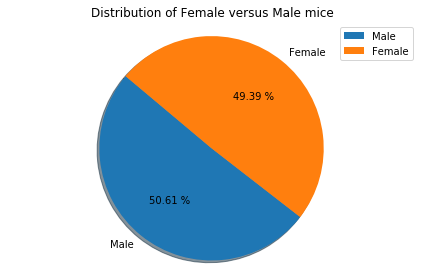

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = merged_df["Sex"].value_counts()

gender_list = gender_counts.keys()

gender_pieplot = plt.pie(gender_counts, labels=gender_list, shadow=True, autopct="%.2f %%", startangle=140)

plt.axis("equal")

plt.title("Distribution of Female versus Male mice")

plt.legend(gender_list)

plt.tight_layout()



 # Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.  

avg_tum = tumor_stats.get(["Mean Tumor Volume (mm3)"])

avg_tum_sort = avg_tum.sort_values("Mean Tumor Volume (mm3)", ascending=True)

avg_tum_sort.head(4)

# Ramicane Data

ramicane_group = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane",:]

ramicane_group = ramicane_group.get(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"])

ramicane_group = ramicane_group.groupby("Mouse ID").last()

ramicane_group_df = ramicane_group.reset_index()

ramicane_df = ramicane_group_df["Tumor Volume (mm3)"]

mean_ramicane = np.mean(ramicane_df)

var_ramicane = np.var(ramicane_df,ddof = 0)

std_ramicane = np.std(ramicane_df,ddof = 0)

print(f"The mean tumor volume for Ramicane is {mean_ramicane}")
print(f"The variance tumor volume for Ramicane is {var_ramicane}")
print(f"The standard deviation tumor volume for Ramicane is {std_ramicane}")

 # Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_ramicane-std_ramicane,3)} and {round(mean_ramicane+std_ramicane,3)}")
print(f"Roughly 95% of the data is between {round(mean_ramicane-2*std_ramicane,3)} and {round(mean_ramicane+2*std_ramicane,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_ramicane-3*std_ramicane,3)} and {round(mean_ramicane+3*std_ramicane,3)}")
print(f"The IQR is {iqr(ramicane_df).round(3)}")

ramicane_group_df.sort_values("Tumor Volume (mm3)", ascending=True)

The mean tumor volume for Ramicane is 36.1913904284
The variance tumor volume for Ramicane is 30.879700059128723
The standard deviation tumor volume for Ramicane is 5.556950607943958
Roughly 68% of the data is between 30.634 and 41.748
Roughly 95% of the data is between 25.077 and 47.305
Roughly 99.7% of the data is between 19.521 and 52.862
The IQR is 9.099


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
13,k403,Ramicane,22.050126
8,g791,Ramicane,29.128472
20,s508,Ramicane,30.276232
14,m546,Ramicane,30.564625
24,z578,Ramicane,30.638696
15,n364,Ramicane,31.095335
11,j913,Ramicane,31.560470
3,a644,Ramicane,32.978522
5,c758,Ramicane,33.397653
9,i177,Ramicane,33.562402


In [8]:
# Capomulin Data

capomulin_group = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin",:]

capomulin_group = capomulin_group.get(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"])

capomulin_group = capomulin_group.groupby("Mouse ID").last()

capomulin_group_df = capomulin_group.reset_index()

capomulin_df = capomulin_group_df["Tumor Volume (mm3)"]


mean_capomulin = np.mean(capomulin_df)

var_capomulin = np.var(capomulin_df,ddof = 0)

std_capomulin = np.std(capomulin_df,ddof = 0)

print(f"The mean tumor volume for Capomulin is {mean_capomulin}")
print(f"The variance tumor volume for Capomulin is {var_capomulin}")
print(f"The standard deviation tumor volume for Capomulin is {std_capomulin}")

 # Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_capomulin-std_capomulin,3)} and {round(mean_capomulin+std_capomulin,3)}")
print(f"Roughly 95% of the data is between {round(mean_capomulin-2*std_capomulin,3)} and {round(mean_capomulin+2*std_capomulin,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_capomulin-3*std_capomulin,3)} and {round(mean_capomulin+3*std_capomulin,3)}")
print(f"The IQR is {iqr(capomulin_df).round(3)}")

capomulin_group_df.sort_values("Tumor Volume (mm3)", ascending=True)



The mean tumor volume for Capomulin is 36.6675677192
The variance tumor volume for Capomulin is 31.356842508556007
The standard deviation tumor volume for Capomulin is 5.599718074024442
Roughly 68% of the data is between 31.068 and 42.267
Roughly 95% of the data is between 25.468 and 47.867
Roughly 99.7% of the data is between 19.868 and 53.467
The IQR is 7.782


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
16,s185,Capomulin,23.343598
11,m601,Capomulin,28.430964
23,x401,Capomulin,28.484033
2,f966,Capomulin,30.485985
19,u364,Capomulin,31.023923
24,y793,Capomulin,31.896238
14,r554,Capomulin,32.377357
12,m957,Capomulin,33.329098
18,t565,Capomulin,34.455298
22,w914,Capomulin,36.041047


In [9]:
# Infubinol Data

infubinol_group = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol",:]

infubinol_group = infubinol_group.get(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"])

infubinol_group = infubinol_group.groupby("Mouse ID").last()

infubinol_group_df = infubinol_group.reset_index()

infubinol_df = infubinol_group_df["Tumor Volume (mm3)"]


mean_infubinol = np.mean(infubinol_df)

var_infubinol = np.var(infubinol_df,ddof = 0)

std_infubinol = np.std(infubinol_df,ddof = 0)

print(f"The mean tumor volume for Infubinol is {mean_infubinol}")
print(f"The variance tumor volume for Infubinol is {var_infubinol}")
print(f"The standard deviation tumor volume for Infubinol is {std_infubinol}")

 # Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_infubinol-std_infubinol,3)} and {round(mean_infubinol+std_infubinol,3)}")
print(f"Roughly 95% of the data is between {round(mean_infubinol-2*std_infubinol,3)} and {round(mean_infubinol+2*std_infubinol,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_infubinol-3*std_infubinol,3)} and {round(mean_infubinol+3*std_infubinol,3)}")
print(f"The IQR is {iqr(infubinol_df).round(3)}")


infubinol_group_df.sort_values("Tumor Volume (mm3)", ascending=True)



The mean tumor volume for Infubinol is 58.1782457852
The variance tumor volume for Infubinol is 71.050440128533
The standard deviation tumor volume for Infubinol is 8.429142312746475
Roughly 68% of the data is between 49.749 and 66.607
Roughly 95% of the data is between 41.32 and 75.037
Roughly 99.7% of the data is between 32.891 and 83.466
The IQR is 11.477


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
5,c326,Infubinol,36.321346
15,o813,Infubinol,45.699331
18,v339,Infubinol,46.250112
12,m756,Infubinol,47.010364
21,w193,Infubinol,50.005138
20,v766,Infubinol,51.542431
19,v719,Infubinol,54.048608
16,q132,Infubinol,54.656549
14,o809,Infubinol,55.629428
17,s121,Infubinol,55.650681


In [10]:
# Ceftamin Data

ceftamin_group = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin",:]

ceftamin_group = ceftamin_group.get(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"])

ceftamin_group = ceftamin_group.groupby("Mouse ID").last()

ceftamin_group_df = ceftamin_group.reset_index()

ceftamin_df = ceftamin_group_df["Tumor Volume (mm3)"]

mean_ceftamin = np.mean(ceftamin_df)

var_ceftamin = np.var(ceftamin_df,ddof = 0)

std_ceftamin = np.std(ceftamin_df,ddof = 0)

print(f"The mean tumor volume for Ceftamin is {mean_ceftamin}")
print(f"The variance tumor volume for Ceftamin is {var_ceftamin}")
print(f"The standard deviation tumor volume for Ceftamin is {std_ceftamin}")

# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_ceftamin-std_ceftamin,3)} and {round(mean_ceftamin+std_ceftamin,3)}")
print(f"Roughly 95% of the data is between {round(mean_ceftamin-2*std_ceftamin,3)} and {round(mean_ceftamin+2*std_ceftamin,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_ceftamin-3*std_ceftamin,3)} and {round(mean_ceftamin+3*std_ceftamin,3)}")
print(f"The IQR is {iqr(ceftamin_df).round(3)}")

ceftamin_group_df.sort_values("Tumor Volume (mm3)", ascending=True)




The mean tumor volume for Ceftamin is 57.7539768252
The variance tumor volume for Ceftamin is 67.18342538085557
The standard deviation tumor volume for Ceftamin is 8.196549602171366
Roughly 68% of the data is between 49.557 and 65.951
Roughly 95% of the data is between 41.361 and 74.147
Roughly 99.7% of the data is between 33.164 and 82.344
The IQR is 15.578


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
20,x226,Ceftamin,45.000000
1,b447,Ceftamin,45.000000
18,u153,Ceftamin,45.000000
16,t573,Ceftamin,45.000000
10,l558,Ceftamin,46.784535
5,h531,Ceftamin,47.784682
4,f436,Ceftamin,48.722078
17,u149,Ceftamin,52.925348
3,b759,Ceftamin,55.742829
2,b487,Ceftamin,56.057749


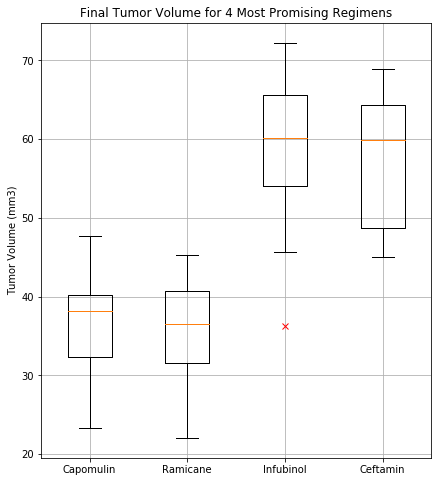

In [11]:
#plt.boxplot({ramicane_group_df["Tumor Volume (mm3)"],infubinol_group_df["Tumor Volume (mm3)"]})

#ceftamin_df, infubinol_df, capomulin_df, ramicane_df

plt.figure(figsize=(7,8))

labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

plt.boxplot([capomulin_df, ramicane_df, infubinol_df, ceftamin_df], labels=labels, sym='rx')

plt.title("Final Tumor Volume for 4 Most Promising Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

plt.show()





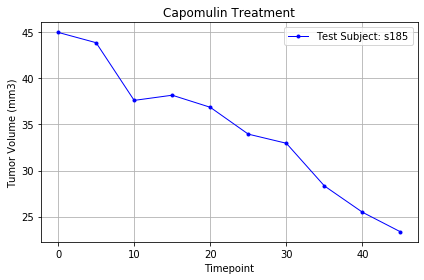

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_group = merged_df.get(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Timepoint"])

only_cap = mouse_group.loc[mouse_group["Drug Regimen"] == "Capomulin", :]

s185_df = only_cap.loc[only_cap["Mouse ID"] == "s185", :]

x_axis = s185_df["Timepoint"]

y_axis = s185_df["Tumor Volume (mm3)"]

s185, = plt.plot(x_axis, y_axis, marker=".", color="blue", linewidth=1)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.title("Capomulin Treatment")
plt.legend(["Test Subject: s185"])
plt.tight_layout()


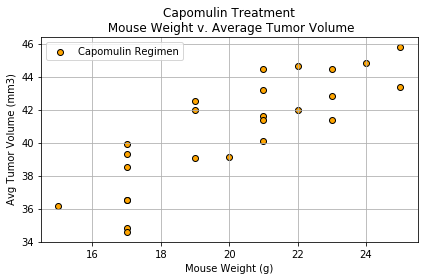

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_only = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin", :]

capo_group = capomulin_only.get(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Weight (g)"])

capo_group_df = capo_group.groupby("Mouse ID")

captum_avg = capo_group_df["Tumor Volume (mm3)"].mean()

capweight = capo_group_df["Weight (g)"].mean()

capweigh_df = pd.DataFrame(capweight)


captum_avg_df = pd.DataFrame(captum_avg)
captum_avg_df

weight_axis = capweigh_df.get("Weight (g)")

tumor_axis = captum_avg_df.get("Tumor Volume (mm3)")

plt.scatter(weight_axis, tumor_axis, marker="o", facecolors="orange", edgecolors="black")
plt.title("Capomulin Treatment\n Mouse Weight v. Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel(" Avg Tumor Volume (mm3)")
plt.grid()
plt.legend(["Capomulin Regimen"])
plt.tight_layout()



The r-squared is: 0.8419363424694718


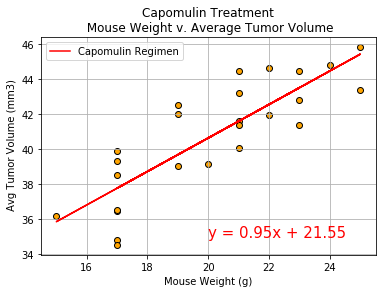

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen 
new_weight = weight_axis.reset_index()
new_tumor = tumor_axis.reset_index()
x_values = new_weight["Weight (g)"]
y_values = new_tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="orange", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.legend(["Capomulin Regimen"])
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel(" Avg Tumor Volume (mm3)")
plt.title("Capomulin Treatment\n Mouse Weight v. Average Tumor Volume")

plt.grid()
print(f"The r-squared is: {rvalue}")
plt.show()